This Notebook demostrate the Naive Bayes algorithm using the make_classification data. Which can generate synthetic classification data for binary or multiclass classification. For more information

https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_classification.html

Importing necessary libraries

In [0]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot
from sklearn.naive_bayes import GaussianNB

Getting data from datasets provided by Sklearn API (make_classification) for demonstrating classification problems.

In [0]:
# generate 2 class dataset
X, y = make_classification(n_samples=1000, n_classes=2, weights=[0.99,0.01], random_state=1)
# split into train/test sets
trainX, testX, trainy, testy = train_test_split(X, y, test_size=0.5, random_state=2)

Creating a Baseline model or No skill model and fitting the data to Naive bayes algorithm and plottting ROC curve for the both models.

The Receiver operating characteristic (ROC) curve is a graphical plot that illustrates the diagnostic ability of a binary classifier system as its discrimination threshold is varied. 

The ROC curve is created by plotting the true positive rate (TPR) against the false positive rate (FPR) at various threshold settings. The true-positive rate is also known as sensitivity, recall or probability of detection in machine learning. The false-positive rate is also known as the fall-out or probability of false alarm and can be calculated as (specificity).

No Skill: ROC AUC=0.500
Naive Bayes: ROC AUC=0.646


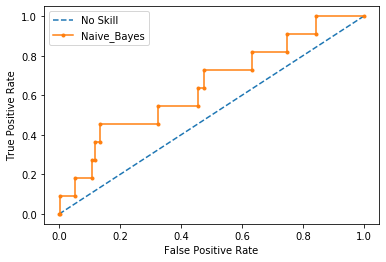

In [0]:
# generate a no skill prediction (majority class)
ns_probs = [0 for _ in range(len(testy))]
# fit a model
model = GaussianNB()
model.fit(trainX, trainy)
# predict probabilities
nb_probs = model.predict_proba(testX)
# keep probabilities for the positive outcome only
nb_probs = nb_probs[:, 1]
# calculate scores
ns_auc = roc_auc_score(testy, ns_probs)
nb_auc = roc_auc_score(testy, nb_probs)
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Naive Bayes: ROC AUC=%.3f' % (nb_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(testy, ns_probs)
nb_fpr, nb_tpr, _ = roc_curve(testy, nb_probs)
# plot the roc curve for the model
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
pyplot.plot(nb_fpr, nb_tpr, marker='.', label='Naive_Bayes')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

The classification report calculates precison, Recall, F1 score. which are better model performance parameters than accuracy.

In [0]:
y_pred = model.predict(testX)
print(classification_report(testy, y_pred))
# Model Accuracy, how often is the classifier correct?
print("Accuracy: Naive Bayes", accuracy_score(testy, y_pred))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99       489
           1       0.00      0.00      0.00        11

    accuracy                           0.98       500
   macro avg       0.49      0.50      0.49       500
weighted avg       0.96      0.98      0.97       500

Accuracy: Naive Bayes 0.976


Conclusion:

Model have a good true positive and true negative rate also model is good at predicting false positives and false negative as well.